In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
# Settings
SEED = 42
SAMPLE_SIZE = 200
PATH_CSV = './top_songs_large.csv'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv(PATH_CSV, nrows=SAMPLE_SIZE)
df.columns

Index(['track_id', 'disc_number', 'duration', 'explicit', 'audio_feature_id',
       'name', 'preview_url', 'track_number', 'popularity', 'is_playable',
       'acousticness', 'analysis_url', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'artist',
       'genre_id'],
      dtype='object')

In [4]:
selected_cols = [
    'duration', 'explicit', 'acousticness', 'danceability',
    'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
    'speechiness','tempo', 'time_signature', 'valence'
]

In [5]:
scaler = StandardScaler()
X_selected = scaler.fit_transform(df[selected_cols])

In [6]:
pca_music = PCA(n_components=2, random_state=SEED).fit(X_selected)

In [7]:
pca_music.explained_variance_

array([3.45518909, 1.66632338])

In [8]:
pca_music.explained_variance_ratio_

array([0.26445486, 0.12753783])

In [9]:
round(
    pd.DataFrame(
        pca_music.components_.T,
        index=selected_cols,
        columns=['PCA1', 'PCA2']
    ),
    3
)

,PCA1,PCA2
duration,-0.023,0.015
explicit,-0.048,-0.603
acousticness,0.347,-0.082
danceability,-0.328,-0.200
energy,-0.423,0.250
instrumentalness,0.353,0.137
key,0.036,0.061
liveness,-0.026,0.030
loudness,-0.472,0.131
speechiness,-0.076,-0.534


In [10]:
df['name_cleaned'] = df['name'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/w0/pmsff68524jdwz_wjsrbl5mw0000gn/T/ipykernel_11466/1037290620.py:1: SyntaxWarning: invalid escape sequence '\s'
  df['name_cleaned'] = df['name'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)


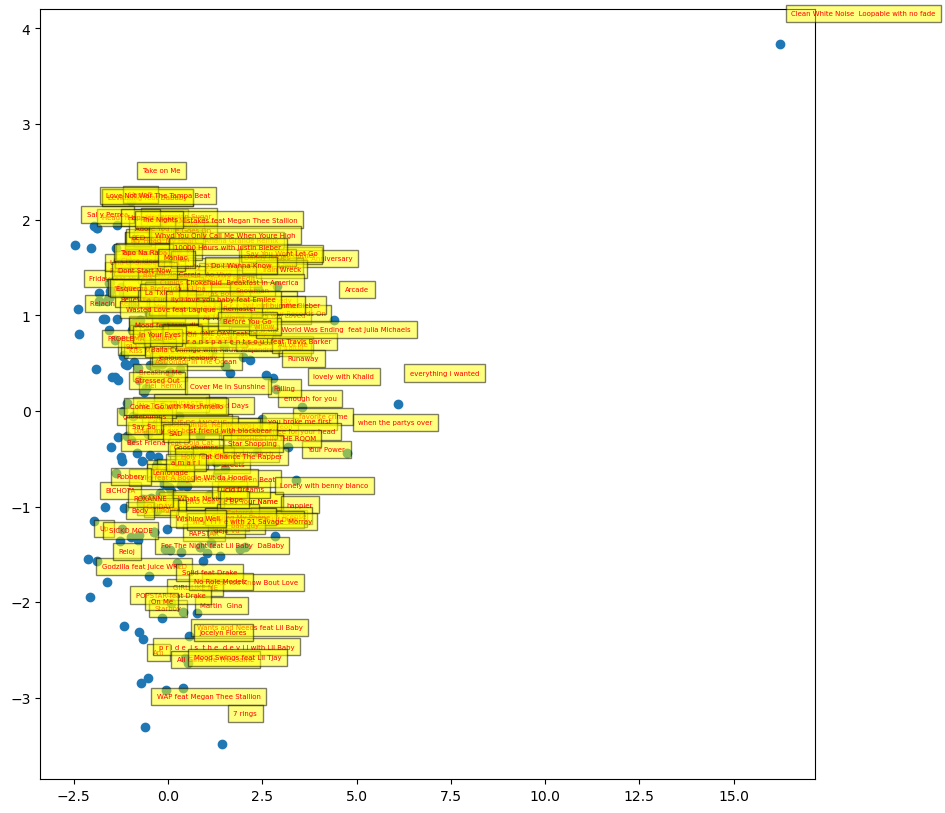

In [11]:
X_music_pca = pca_music.transform(X_selected)

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_music_pca[:, 0], X_music_pca[:, 1])
for i in range(X_selected.shape[0]):
    plt.text(
        x=X_music_pca[i, 0] + 0.3,
        y=X_music_pca[i, 1] + 0.3,
        s=df['name_cleaned'][i],
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
plt.show()

In [12]:
target_name = 'Blame on Me'
target_name = 'Shine On You Crazy Diamond Pts 15'
row = df[df['name_cleaned'] == target_name]
row

,track_id,disc_number,duration,explicit,audio_feature_id,name,preview_url,track_number,popularity,is_playable,acousticness,analysis_url,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,genre_id,name_cleaned


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.542800
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.558365
[t-SNE] KL divergence after 1000 iterations: 0.650219


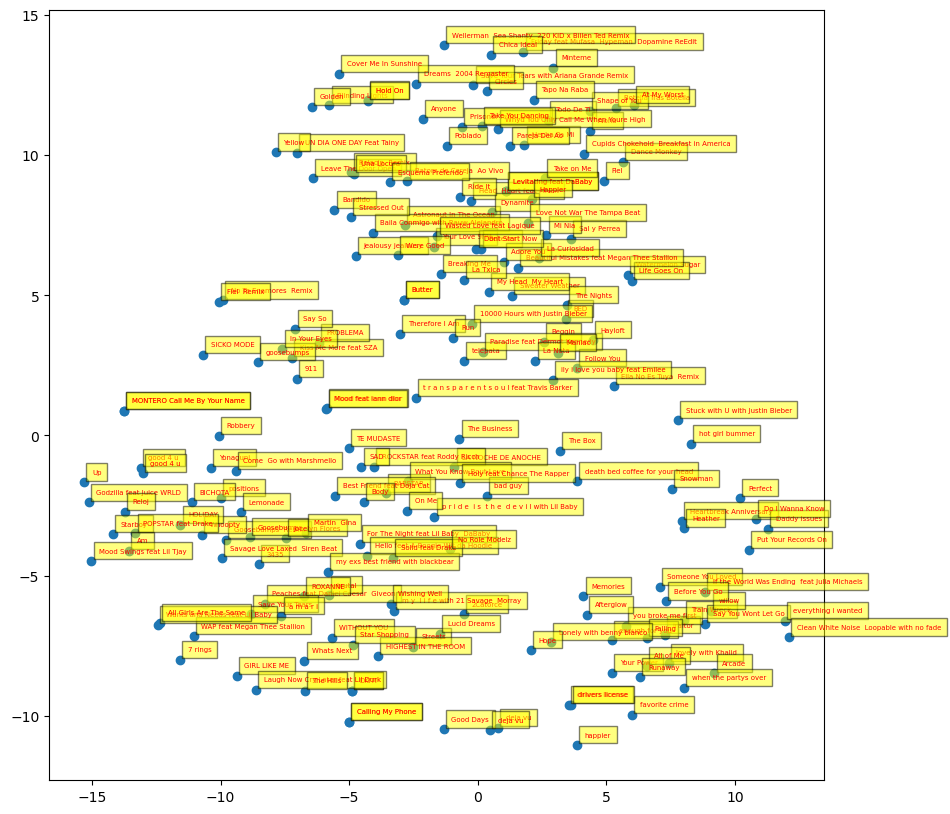

In [13]:
tsne = TSNE(verbose=1, random_state=SEED)
tsne_results = tsne.fit_transform(X_selected)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(tsne_results[:, 0], y=tsne_results[:, 1])
for i in range(tsne_results.shape[0]):
    plt.text(
        x=tsne_results[i, 0] + 0.3,
        y=tsne_results[i, 1] + 0.3,
        s=df['name_cleaned'][i],
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
plt.show()